# Agregacion de datos por categoria 

In [1]:
import numpy as np
import pandas as pd

In [2]:
gender =  ["Male","Female"]
income =  ["Poor","Middle Class","Rich"]

In [3]:
n = 500
gender_data = []
income_data = []
for i in range(n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [4]:
gender_data[:10]

['Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male']

In [5]:
income_data[:10]

['Middle Class',
 'Middle Class',
 'Rich',
 'Middle Class',
 'Rich',
 'Poor',
 'Poor',
 'Middle Class',
 'Poor',
 'Poor']

In [6]:
# m = media , s = desviacion 
#Z -> N(0,1)
# N(m,s) -> m + s * z
height = 170 + 20 * np.random.randn(n)
weigth = 75 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
incomes = 18000 + 3500 * np.random.randn(n)


In [7]:
data = pd.DataFrame(
    {
        "Gender" : gender_data,
        "Economic Status" : income_data,
        "Height" : height,
        "Weight" : weigth,
        "Age" : age,
        "Incomes" : incomes
    }
)

In [8]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Incomes
0,Female,Middle Class,190.424379,78.763797,9.272526,19973.465046
1,Female,Middle Class,190.358236,89.875603,41.438784,11218.585319
2,Female,Rich,163.933330,71.642866,36.711720,20008.657614
3,Female,Middle Class,189.741352,129.297535,30.743321,13485.214988
4,Male,Rich,178.030314,40.444665,34.662659,22447.056318


In [9]:
data["Age"] = data["Age"].astype(int)  # cambiar el tipo de data de una columna

In [10]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Incomes
0,Female,Middle Class,190.424379,78.763797,9,19973.465046
1,Female,Middle Class,190.358236,89.875603,41,11218.585319
2,Female,Rich,163.933330,71.642866,36,20008.657614
3,Female,Middle Class,189.741352,129.297535,30,13485.214988
4,Male,Rich,178.030314,40.444665,34,22447.056318


## Agrupacion de datos

In [11]:
grouped_gender = data.groupby("Gender") # retorna un objeto por lo que es mejor asignarlo a una variable

In [12]:
grouped_gender.groups

{'Female': Int64Index([  0,   1,   2,   3,   8,  11,  13,  15,  19,  23,
             ...
             482, 484, 487, 488, 489, 491, 493, 494, 495, 498],
            dtype='int64', length=247),
 'Male': Int64Index([  4,   5,   6,   7,   9,  10,  12,  14,  16,  17,
             ...
             477, 478, 483, 485, 486, 490, 492, 496, 497, 499],
            dtype='int64', length=253)}

In [13]:
for names, groups in grouped_gender:
    print(names)
    print(groups)
   
    

Female
     Gender Economic Status      Height      Weight  Age       Incomes
0    Female    Middle Class  190.424379   78.763797    9  19973.465046
1    Female    Middle Class  190.358236   89.875603   41  11218.585319
2    Female            Rich  163.933330   71.642866   36  20008.657614
3    Female    Middle Class  189.741352  129.297535   30  13485.214988
8    Female            Poor  147.570801   67.865887   52  24310.661214
..      ...             ...         ...         ...  ...           ...
491  Female    Middle Class  177.228190   34.241050   43  19791.913040
493  Female            Poor  164.663113  104.886273   37  22290.850444
494  Female            Poor  152.102637   52.056856   31  16398.433209
495  Female            Poor  178.111096   40.426732   43  22658.008109
498  Female            Poor  169.351935   52.284508   28  19139.145571

[247 rows x 6 columns]
Male
    Gender Economic Status      Height     Weight  Age       Incomes
4     Male            Rich  178.030314  40.

In [14]:
#Si queremos solo la informacion de una agrupacion espesifica 
grouped_gender.get_group("Female")

,Gender,Economic Status,Height,Weight,Age,Incomes
0,Female,Middle Class,190.424379,78.763797,9,19973.465046
1,Female,Middle Class,190.358236,89.875603,41,11218.585319
2,Female,Rich,163.933330,71.642866,36,20008.657614
3,Female,Middle Class,189.741352,129.297535,30,13485.214988
8,Female,Poor,147.570801,67.865887,52,24310.661214
...,...,...,...,...,...,...
491,Female,Middle Class,177.228190,34.241050,43,19791.913040
493,Female,Poor,164.663113,104.886273,37,22290.850444
494,Female,Poor,152.102637,52.056856,31,16398.433209
495,Female,Poor,178.111096,40.426732,43,22658.008109


In [15]:
double_group = data.groupby(["Gender","Economic Status"])

In [16]:
for names, groups in double_group:
    print(names)
    print(groups)
   

('Female', 'Middle Class')
     Gender Economic Status      Height      Weight  Age       Incomes
0    Female    Middle Class  190.424379   78.763797    9  19973.465046
1    Female    Middle Class  190.358236   89.875603   41  11218.585319
3    Female    Middle Class  189.741352  129.297535   30  13485.214988
13   Female    Middle Class  174.685670   76.556199   64  16321.139935
15   Female    Middle Class  166.791853   60.584341   29  17847.460802
..      ...             ...         ...         ...  ...           ...
479  Female    Middle Class  171.873913   73.721512   24  19418.233363
484  Female    Middle Class  169.967889   81.283340   34  19526.397520
488  Female    Middle Class  198.370323  115.978958   37  19755.285780
489  Female    Middle Class  153.048590   79.244203   15  14699.065458
491  Female    Middle Class  177.228190   34.241050   43  19791.913040

[96 rows x 6 columns]
('Female', 'Poor')
     Gender Economic Status      Height      Weight  Age       Incomes
8    Fem

In [17]:
double_group.get_group(("Male","Poor"))

,Gender,Economic Status,Height,Weight,Age,Incomes
5,Male,Poor,185.840648,32.057417,26,15785.798679
6,Male,Poor,175.441170,61.074280,26,18624.960129
9,Male,Poor,172.803095,35.431753,8,16422.240175
16,Male,Poor,171.272729,94.419156,40,26605.239379
17,Male,Poor,195.176546,74.186638,48,19164.481366
...,...,...,...,...,...,...
454,Male,Poor,164.966657,63.819546,19,21468.993242
456,Male,Poor,179.788426,81.028633,28,16853.366183
477,Male,Poor,198.859958,87.836540,42,12816.999745
486,Male,Poor,180.778529,89.646238,15,14380.928189


In [18]:
double_group.sum()

Height       Weight   Age       Incomes
Gender Economic Status                                               
Female Middle Class     16122.940318  7409.690232  2713  1.714365e+06
       Poor             13232.045881  5769.561756  2399  1.431903e+06
       Rich             12316.919040  5171.803771  2200  1.364388e+06
Male   Middle Class     14898.981436  6450.296654  2800  1.637165e+06
       Poor             12747.643393  5369.824112  2390  1.350855e+06
       Rich             15235.392713  6852.548924  2809  1.585712e+06

In [19]:
double_group.mean()

Height     Weight        Age       Incomes
Gender Economic Status                                                
Female Middle Class     167.947295  77.184273  28.260417  17857.965070
       Poor             169.641614  73.968740  30.756410  18357.726286
       Rich             168.724918  70.846627  30.136986  18690.239762
Male   Middle Class     167.404286  72.475243  31.460674  18395.111643
       Poor             172.265451  72.565191  32.297297  18254.800104
       Rich             169.282141  76.139432  31.211111  17619.022750

In [20]:
double_group.size()

Gender  Economic Status
Female  Middle Class       96
        Poor               78
        Rich               73
Male    Middle Class       89
        Poor               74
        Rich               90
dtype: int64

In [21]:
double_group.describe()

Height                                                 \
                        count        mean        std         min         25%   
Gender Economic Status                                                         
Female Middle Class      96.0  167.947295  22.448711  113.556055  151.573169   
       Poor              78.0  169.641614  20.891149  128.466009  154.264901   
       Rich              73.0  168.724918  19.670958  113.530156  153.207397   
Male   Middle Class      89.0  167.404286  17.442623  130.923343  155.504539   
       Poor              74.0  172.265451  18.687941  118.683852  161.920739   
       Rich              90.0  169.282141  20.540610  105.726508  158.302735   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     169.845201  182.167085  225.192661   96.0  77.184273   
       Poor             168.514019  184.531578  215.449372   78.0  73.968740   
       Rich             171.190095  181.616147  211.790756   73.0  70.846627   
Male   Middle Class     167.067971  177.812059  224.672409   89.0  72.475243   
       Poor             172.276649  185.891343  213.670374   74.0  72.565191   
       Rich             170.128297  184.431817  218.316936   90.0  76.139432   

                        ...   Age       Incomes                             \
                        ...   75%   max   count          mean          std   
Gender Economic Status  ...                                                  
Female Middle Class     ...  37.0  64.0    96.0  17857.965070  3293.631008   
       Poor             ...  37.0  55.0    78.0  18357.726286  3812.827691   
       Rich             ...  39.0  56.0    73.0  18690.239762  3017.165152   
Male   Middle Class     ...  41.0  60.0    89.0  18395.111643  3216.839210   
       Poor             ...  42.0  59.0    74.0  18254.800104  3988.297952   
       Rich             ...  40.0  63.0    90.0  17619.022750  3639.177522   

                                                                  \
                                 min           25%           50%   
Gender Economic Status                                             
Female Middle Class      8325.452615  15637.239114  17971.935440   
       Poor              7242.189108  16407.501216  18971.610275   
       Rich             10582.098351  16091.081498  18422.273449   
Male   Middle Class     10876.339169  16009.240403  18274.323762   
       Poor              9409.001289  15944.471332  18462.155553   
       Rich              9568.042786  15024.037811  17363.986114   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     20193.262985  25028.628230  
       Poor             21123.588163  27286.431598  
       Rich             21120.995153  24873.414260  
Male   Middle Class     20273.135021  26066.404600  
       Poor             20700.715137  28452.578065  
       Rich             20060.097733  25487.078214  

[6 rows x 32 columns]

In [22]:
grouped_income = double_group["Incomes"]

In [23]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      96.0  17857.965070  3293.631008   8325.452615   
       Poor              78.0  18357.726286  3812.827691   7242.189108   
       Rich              73.0  18690.239762  3017.165152  10582.098351   
Male   Middle Class      89.0  18395.111643  3216.839210  10876.339169   
       Poor              74.0  18254.800104  3988.297952   9409.001289   
       Rich              90.0  17619.022750  3639.177522   9568.042786   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     15637.239114  17971.935440  20193.262985  25028.628230  
       Poor             16407.501216  18971.610275  21123.588163  27286.431598  
       Rich             16091.081498  18422.273449  21120.995153  24873.414260  
Male   Middle Class     16009.240403  18274.323762  20273.135021  26066.404600  
       Poor             15944.471332  18462.155553  20700.715137  28452.578065  
       Rich             15024.037811  17363.986114  20060.097733  25487.078214

In [24]:
double_group.aggregate(
    {
        "Incomes" : np.sum,
        "Age"    : np.mean,
        "Height" : np.std
    }
)

Incomes        Age     Height
Gender Economic Status                                    
Female Middle Class     1.714365e+06  28.260417  22.448711
       Poor             1.431903e+06  30.756410  20.891149
       Rich             1.364388e+06  30.136986  19.670958
Male   Middle Class     1.637165e+06  31.460674  17.442623
       Poor             1.350855e+06  32.297297  18.687941
       Rich             1.585712e+06  31.211111  20.540610

In [25]:
double_group.aggregate(
    {
        "Age"    : np.mean,
        "Height" : lambda h:(np.mean(h)/np.std(h))
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     28.260417  7.520651
       Poor             30.756410  8.172821
       Rich             30.136986  8.636721
Male   Middle Class     31.460674  9.651803
       Poor             32.297297  9.280923
       Rich             31.211111  8.287510

In [26]:
double_group.aggregate([np.sum,np.mean,np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     16122.940318  167.947295  22.448711  7409.690232   
       Poor             13232.045881  169.641614  20.891149  5769.561756   
       Rich             12316.919040  168.724918  19.670958  5171.803771   
Male   Middle Class     14898.981436  167.404286  17.442623  6450.296654   
       Poor             12747.643393  172.265451  18.687941  5369.824112   
       Rich             15235.392713  169.282141  20.540610  6852.548924   

                                               Age                        \
                             mean        std   sum       mean        std   
Gender Economic Status                                                     
Female Middle Class     77.184273  20.467078  2713  28.260417  11.857261   
       Poor             73.968740  22.027288  2399  30.756410  10.649292   
       Rich             70.846627  26.706134  2200  30.136986  12.394348   
Male   Middle Class     72.475243  27.304641  2800  31.460674  12.599654   
       Poor             72.565191  20.890011  2390  32.297297  12.173101   
       Rich             76.139432  24.406945  2809  31.211111  11.890412   

                             Incomes                             
                                 sum          mean          std  
Gender Economic Status                                           
Female Middle Class     1.714365e+06  17857.965070  3293.631008  
       Poor             1.431903e+06  18357.726286  3812.827691  
       Rich             1.364388e+06  18690.239762  3017.165152  
Male   Middle Class     1.637165e+06  18395.111643  3216.839210  
       Poor             1.350855e+06  18254.800104  3988.297952  
       Rich             1.585712e+06  17619.022750  3639.177522

In [27]:
double_group.aggregate([lambda h:(np.mean(h)/np.std(h))])

Height    Weight       Age   Incomes
                        <lambda>  <lambda>  <lambda>  <lambda>
Gender Economic Status                                        
Female Middle Class     7.520651  3.790939  2.395896  5.450431
       Poor             8.172821  3.379785  2.906811  4.845891
       Rich             8.636721  2.671181  2.448338  6.237506
Male   Middle Class     9.651803  2.669358  2.511095  5.750780
       Poor             9.280923  3.497390  2.671280  4.608334
       Rich             8.287510  3.137057  2.639603  4.868608

## Filtrado de Datos 

In [47]:
double_group["Age"].filter(lambda x: x.sum() > 2400)

0       9
1      41
3      30
4      34
7      20
       ..
490    47
491    43
492    32
497    42
499    41
Name: Age, Length: 275, dtype: int32

## Tranformacion de variables 

In [51]:
zscore =  lambda x : (x - x.mean())/x.std()

In [54]:
z_group = double_group.transform(zscore)

In [56]:
import matplotlib.pyplot as plt 

(array([ 10.,  19.,  38.,  94., 102., 106.,  81.,  38.,  10.,   2.]),
 array([-2.79310011, -2.21237492, -1.63164973, -1.05092453, -0.47019934,
         0.11052585,  0.69125104,  1.27197624,  1.85270143,  2.43342662,
         3.01415181]),
 <a list of 10 Patch objects>)

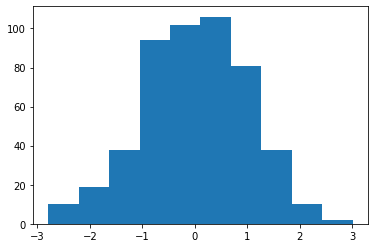

In [58]:
plt.hist(z_group["Age"])

In [59]:
fill_na_mean = lambda x : x.fillna(x.mean)

In [60]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Incomes
0,190.424379,78.763797,9,19973.465046
1,190.358236,89.875603,41,11218.585319
2,163.933330,71.642866,36,20008.657614
3,189.741352,129.297535,30,13485.214988
4,178.030314,40.444665,34,22447.056318
...,...,...,...,...
495,178.111096,40.426732,43,22658.008109
496,134.494583,64.803779,41,20428.222667
497,159.622792,70.472464,42,16009.240403
498,169.351935,52.284508,28,19139.145571


## Operaciones diversas muy utiles 

In [62]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Incomes
0,Female,Middle Class,190.424379,78.763797,9,19973.465046
2,Female,Rich,163.933330,71.642866,36,20008.657614
4,Male,Rich,178.030314,40.444665,34,22447.056318
5,Male,Poor,185.840648,32.057417,26,15785.798679
7,Male,Middle Class,168.810735,86.036423,20,19187.131015
8,Female,Poor,147.570801,67.865887,52,24310.661214


In [63]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Incomes
482,Female,Rich,146.201915,21.389368,38,21231.201719
491,Female,Middle Class,177.228190,34.241050,43,19791.913040
496,Male,Poor,134.494583,64.803779,41,20428.222667
497,Male,Middle Class,159.622792,70.472464,42,16009.240403
498,Female,Poor,169.351935,52.284508,28,19139.145571
499,Male,Rich,137.417211,45.297818,41,18246.918618


In [65]:
double_group.nth(32) # Cuando ocupo una fila en concreto uso la funcion nth (n-esima fila)

Height     Weight  Age       Incomes
Gender Economic Status                                          
Female Middle Class     120.456829  63.653776   20  15620.451834
       Poor             139.567579  57.453405   32  16645.043375
       Rich             174.598317  85.713971   24  21541.839980
Male   Middle Class     187.976433  45.184413   28  17975.410112
       Poor             178.999062  96.856632   39  25891.755092
       Rich             208.156837  94.727674   28  14841.118074

In [67]:
double_group.nth(82) # Tener cuidado de saber que todos los subgrupos tiene el mismo numero de filas , sino haran falta filas rn la respuesta de nth

Height     Weight  Age       Incomes
Gender Economic Status                                          
Female Middle Class     148.181851  50.634621   38  19266.450647
Male   Middle Class     149.925664  60.327979   13  17073.650180
       Rich             218.316936  68.413996   14  19830.375957

In [69]:
data_sorted = data.sort_values(["Age","Incomes"])

In [70]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Incomes
168,Male,Rich,157.771541,73.494263,-2,19754.988595
209,Male,Middle Class,180.395036,82.338026,-1,19295.047145
333,Female,Rich,146.499386,77.384185,0,20286.253055
231,Female,Middle Class,206.709895,95.612864,1,16038.729325
155,Female,Middle Class,169.619809,58.999174,1,22221.795740
267,Male,Poor,168.850236,85.254574,2,19169.558615
308,Female,Rich,138.053889,121.144860,2,20066.260134
435,Female,Rich,173.870331,65.532952,4,21135.683242
53,Female,Middle Class,184.046573,68.211936,4,23866.745512
370,Female,Rich,153.207397,96.991541,5,15869.827030


In [71]:
age_groped = data_sorted.groupby("Gender")

In [74]:
age_groped.head(1)

,Gender,Economic Status,Height,Weight,Age,Incomes
168,Male,Rich,157.771541,73.494263,-2,19754.988595
333,Female,Rich,146.499386,77.384185,0,20286.253055


In [73]:
age_groped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Incomes
202,Male,Rich,160.003445,68.640515,63,16794.067367
13,Female,Middle Class,174.685670,76.556199,64,16321.139935


## Conjunto de entrenamiento y conjunto de testing

In [76]:
data = pd.read_csv("python-ml-course/datasets/customer-churn-model/Customer Churn Model.txt")

In [77]:
len(data)

3333

## Dividir utilizando la destribucion normal

In [147]:
vector = np.random.randn(len(data))
vector

array([ 0.17328552, -1.79635129, -1.3476117 , ...,  0.4104479 ,
        0.74610173,  0.46972578])

(array([ 13.,  83., 229., 542., 792., 807., 498., 260.,  85.,  24.]),
 array([-3.15900574, -2.53332676, -1.90764778, -1.28196881, -0.65628983,
        -0.03061085,  0.59506813,  1.22074711,  1.84642609,  2.47210506,
         3.09778404]),
 <a list of 10 Patch objects>)

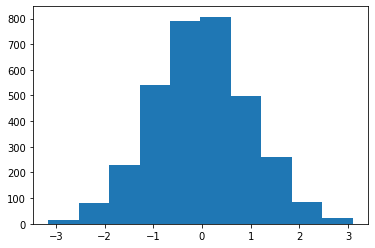

In [148]:
plt.hist(vector)

In [149]:
check = (vector < 0.75).astype(np.uint8)

In [150]:
check

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

(array([ 728.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2605.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

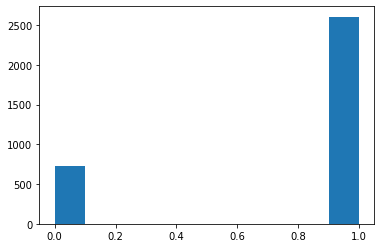

In [151]:
plt.hist(check)

In [152]:
check2 = check.astype(bool)
training = data[check2]
testing = data[~check2]

In [153]:
len(training)

2605

In [154]:
len(testing)

728

## Con la libreria sklearn

In [157]:
from sklearn.model_selection import train_test_split

In [161]:
train , test = train_test_split(data,test_size = 0.2) # test_size = x nos dice cuanto queremos en % para test en este caso 0.2 es 20 %

In [162]:
len(train)

2666

In [163]:
len(test)

667

## Usando una funcion de shuffle

In [164]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [167]:
import sklearn as sk

In [169]:
data = sk.utils.shuffle(data)

In [170]:
cut_id = int(0.75 * len(data))
train_data = data[:cut_id]
test_data = data[cut_id+1:]

In [171]:
len(train_data)

2499

In [172]:
len(test_data)

833